Load the TrainingHours column into a NumPy array.

- Convert to float datatype
- Find mean & standard deviation

Final output: Two numeric values

In [49]:
import pandas as pd
import numpy as np

df = pd.read_csv('sample_data/final-employee-ds.csv')

training_hours = df['TrainingHours'].to_numpy().astype(float)

mean = np.mean(training_hours)
std = np.std(training_hours)

print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std:.3f}")

Mean: 24.190
Standard Deviation: 13.842


Handle missing values (if any):

- Fill missing Salary with department-wise median
- Calculate total Salary sum for employees with ExperienceYears > 12 and ProjectCount > 5

Final output: One numeric value

In [50]:
median = df.groupby('Department')['Salary'].median()
# median
# median.index

null_salary = df['Salary'].isna()
# null_salary

for dept in median.index:
    df.loc[null_salary & (df['Department'] == dept), 'Salary'] = median[dept]


senior = df[(df['ExperienceYears'] > 12) & (df['ProjectCount'] > 5)]

total_salary = senior['Salary'].sum()

print(f"Total Salary: {total_salary}")


Total Salary: 1985775.5


Filter employees who:

- Department = "IT" or "Finance"
- Age between 30–45
- PerformanceScore > 88
- Sort by Salary descending

Final output: Table with Name, Department, Salary, PerformanceScore

In [51]:
filter_df = df[(df['Department'].isin(['IT', 'Finance'])) & (df['Age'] >= 30) & (df['Age'] <= 45) & (df['PerformanceScore'] > 88)]

sort_df = filter_df.sort_values(by='Salary', ascending=False)

new_df = sort_df[['Name', 'Department', 'Salary', 'PerformanceScore']]

print(new_df)

           Name Department    Salary  PerformanceScore
94  Employee_95         IT  140386.0                94
88  Employee_89    Finance  126027.0                92
4    Employee_5    Finance   85543.0                97
32  Employee_33         IT   83919.0                98
55  Employee_56    Finance   49540.0                94


Add new column SalaryPerHour = Salary ÷ (WorkHoursPerWeek × 4)

- Filter top 5 employees by SalaryPerHour

Final output: Table(5 Rows) with Name, SalaryPerHour

In [52]:
df['SalaryPerHour'] = df['Salary'] / (df['WorkHoursPerWeek'] * 4)

employees = df.sort_values(by='SalaryPerHour', ascending=False).head(5)

new_employees = employees[['Name', 'SalaryPerHour']]

print(new_employees)

           Name  SalaryPerHour
46  Employee_47     981.278571
27  Employee_28     971.292857
31  Employee_32     967.392857
79  Employee_80     945.335526
80  Employee_81     937.858974


Create a bar chart showing the count of employees in each Department, separated by Gender. You can solve the question with any of the package (Matplotlib , Seaborn , Plotly )

**Dataset Columns Used:**

- Department → Categorical variable (IT, Finance, HR, Marketing, Management)
- Gender → Categorical variable (Male, Female)

**Expected Output**

A bar chart where:

- x-axis → Department
- y-axis → Number of employees
- Each bar split into Male and Female segments
- Colors differentiate gender

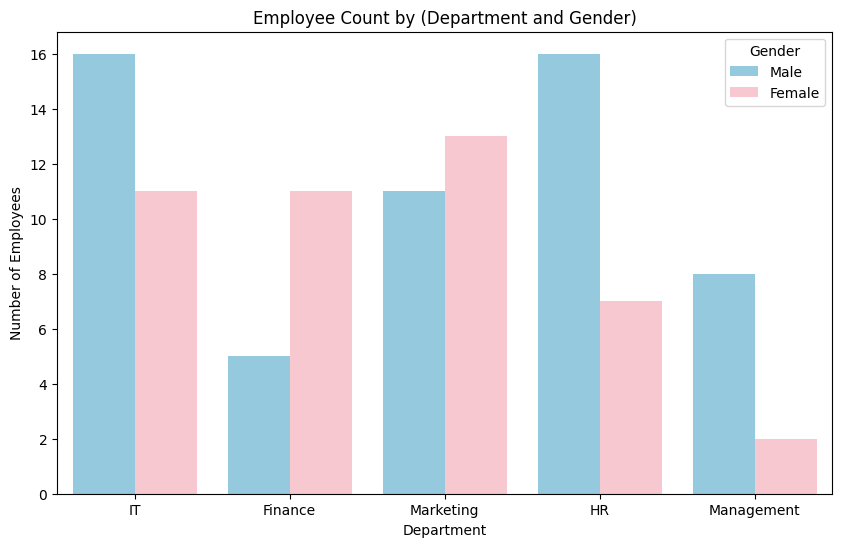

In [53]:
from IPython.terminal.embed import EmbeddedMagics
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Department', hue='Gender', palette=['skyblue', 'pink'])

plt.title('Employee Count by (Department and Gender)')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.legend(title='Gender')
plt.show()